### Problem overview

In [49]:
%%svg
<svg xmlns="http://www.w3.org/2000/svg" height="0" width="0">
  <defs>
    <circle id="pivot" r="5" cx="5" cy="5" stroke="black" fill="lightslategrey" />
    <g id="mount">
      <rect height="30" width="30" stroke="black" fill="whitesmoke" />
      <use href="#pivot" x="10" y="10" />
    </g>
    <g id="upperShockMount">
      <use href="#mount" x="100" y="50" />
    </g>
    <g id="swingarm">
      <g transform="translate(50,300)">
          <use href="#mount" x="-5" y="-5" />
          <g transform="rotate(15,15,15)">
              <circle r="200" cx="490" cy="10" stroke="black" fill="none" />
              <rect x="100" y="-30" width="20" height="50" stroke="black" fill="lightsteelblue" />
              <rect x="0" y="0" width="500" height="20" stroke="black" fill="lightsteelblue" />
              <use href="#pivot" x="5" y="5" />
              <use href="#pivot" x="485" y="5" />
              <use href="#pivot" x="105" y="-25" />
              <g>
                <line x1="5" y1="25" x2="5" y2="50" style="stroke:black;" />
                <line x1="105" y1="25" x2="105" y2="50" style="stroke:black;" />
                <line x1="5" y1="40" x2="105" y2="40" style="stroke:black;" />
                <use href="#dc" x="40" y="60" /> <!-- forward ref; not defined until later -->
                <line x1="125" y1="10" x2="150" y2="10" style="stroke:black;" />
                <line x1="125" y1="-20" x2="150" y2="-20" style="stroke:black;" />
                <line x1="140" y1="10" x2="140" y2="-20" style="stroke:black;" />
                <use href="#db" transform="translate(165,5) rotate(-90)" /> <!-- forward ref; not defined until later -->
                <g transform="translate(5,-10) rotate(-15)">
                    <line x1="0" y1="0" x2="0" y2="-25" style="stroke:black;" />
                    <line x1="100" y1="0" x2="100" y2="-25" style="stroke:black;" />
                    <line x1="0" y1="-15" x2="100" y2="-15" style="stroke:black;" />
                    <use href="#da" x="40" y="-20" /> <!-- forward ref; not defined until later -->
                </g>
              </g>
          </g>
        </g>
    </g>
    <g id="shock">
      <g transform="translate(125,60) rotate(80) scale(0.65) translate(50,0)">
          <rect height="10" width="300" y="10" />
          <rect height="30" width="200" />
      </g>
    </g>
    <g id="everything">
      <use href="#swingarm" />
      <use href="#upperShockMount" />
      <use href="#shock"/>
    </g>
  </defs>
</svg>

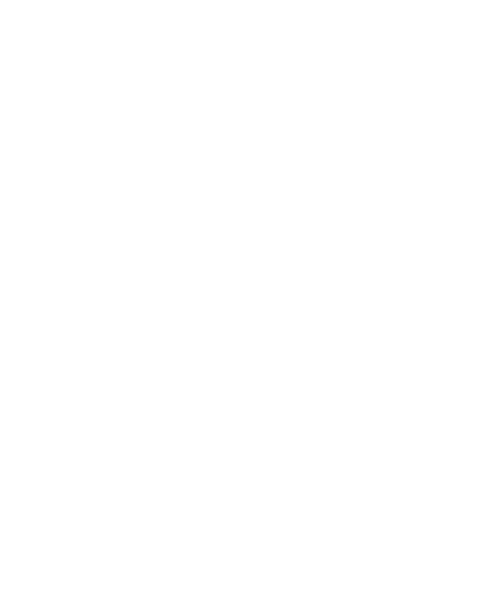

In [50]:
from string import Template
s = Template("""
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 500 600" height="400px">
  <defs>
    <text id="dc" fill="black">foo!</text>
    <text id="da" fill="black">blah!</text>
    <text id="db" fill="black">bar!</text>
  </defs>
  <use href="#everything"/>
</svg>
""")

from IPython.display import SVG
SVG(data=s.substitute())

In [51]:
# useful constants
pi_deg = 180.0 / math.pi

# known dimensions
# lengths are millimeters, angles are radians
d_y_pivot1_rest = 300.0 # height of front swingarm pivot at rest (full extension)
d_y_axle = 200.0 # height of rear axle above ground
l_pivot1_axle = 430.0 # length of swingarm between front pivot and axle
d_y_swingarm_pivot2 = 50.0 # distance between the swingarm centre-line and the swingarm shock pivot
d_x_swingarm_pivot2 = 100.0 # distance along the swingarm centre-line between swingarm pivot and shock pivot
d_pivot1_pivot3 = 250.0 # distance between swingarm pivot and upper shock mount
d_pivot2_pivot3_rest = 270.0 # distance between upper and lower shock mounts at full extension

In [52]:
%matplotlib inline

### Wheel and swingarm motion

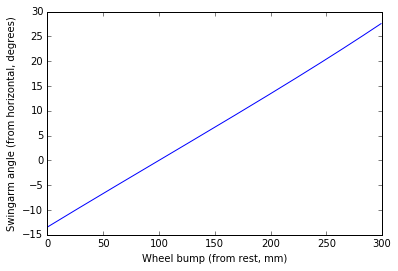

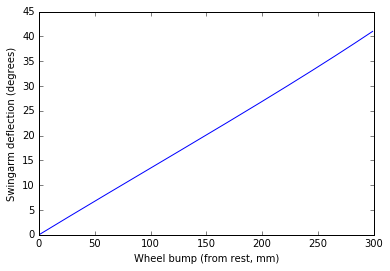

In [53]:
import matplotlib.pyplot as plt
from math import asin, pi
def wheelBumpToSwingarmAngleAbs(bump):
    return asin(((bump + d_y_axle) - d_y_pivot1_rest) / l_pivot1_axle)

a_swingarm_horz_rest = wheelBumpToSwingarmAngleAbs(0) # angle of swingarm relative to horizon at full extension

def wheelBumpToSwingarmDeflection(bump):
    return wheelBumpToSwingarmAngleAbs(bump) - a_swingarm_horz_rest

bumps = xrange(0,300)

plt.plot(bumps, [wheelBumpToSwingarmAngleAbs(b) * pi_deg for b in bumps])
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Swingarm angle (from horizontal, degrees)')

deflections = [wheelBumpToSwingarmDeflection(b) for b in bumps]

plt.figure()
plt.plot(bumps, [d * pi_deg for d in deflections])
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Swingarm deflection (degrees)');

### Pivot geometry

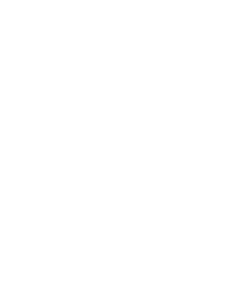

In [54]:
from string import Template
s = Template("""
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 250 300" height="400px">
  <use href="#swingarm" x="-75" y="-150" />
</svg>
""")

from IPython.display import SVG
SVG(data=s.substitute())

In [55]:
a_swingarm_pivot2 = math.atan(d_y_swingarm_pivot2 / d_x_swingarm_pivot2)
'Included angle between swingarm centre-line and shock mount on swingarm - {} degrees'.format(a_swingarm_pivot2 * pi_deg)

'Included angle between swingarm centre-line and shock mount on swingarm - 26.5650511771 degrees'

In [56]:
d_pivot1_pivot2 = math.sqrt(d_x_swingarm_pivot2**2 + d_y_swingarm_pivot2**2)

def includedAngleMountsResting():
    a = d_pivot2_pivot3_rest
    b = d_pivot1_pivot3
    c = d_pivot1_pivot2
    alpha = math.acos(((b**2) + (c**2) - (a**2)) / (2*b*c))
    return alpha

a_pivot2_pivot3_rest = includedAngleMountsResting()
'Included angle between upper and lower shock mounts at rest - {} degrees'.format(a_pivot2_pivot3_rest * pi_deg)

'Included angle between upper and lower shock mounts at rest - 87.8471235095 degrees'

### Wheel and shock motion

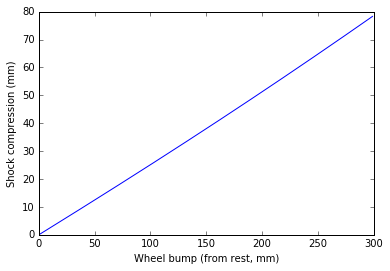

In [57]:
import matplotlib.pyplot as plt
def distanceBetweenMounts(includedAngle):
    b = d_pivot1_pivot3
    c = d_pivot1_pivot2
    alpha = includedAngle
    a = math.sqrt((b**2) + (c**2) - (2*b*c * math.cos(alpha)))
    return a

plt.plot(bumps, [d_pivot2_pivot3_rest - distanceBetweenMounts(a_pivot2_pivot3_rest - d) for d in deflections]);
plt.xlabel('Wheel bump (from rest, mm)')
plt.ylabel('Shock compression (mm)');